<a href="https://colab.research.google.com/github/miraculusik/tensorflow-deep-learning-practices/blob/main/tensorflow_regression_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 

Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing

In [3]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data(test_split=0.15)
X_train.shape, X_test.shape

57344/57026 [==============================] - 0s 0us/step


((430, 13), (76, 13))

In [4]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [1.91330e-01, 2.20000e+01, 5.86000e+00, ..., 1.91000e+01,
        3.89130e+02, 1.84600e+01],
       [3.54800e-02, 8.00000e+01, 3.64000e+00, ..., 1.64000e+01,
        3.95180e+02, 9.25000e+00],
       [5.82401e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.07400e+01]])

In [5]:
X_train.max()

711.0

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
X_train.max()

1.0000000000000002

In [8]:
X_train.shape

(430, 13)

In [28]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation="elu"),
  tf.keras.layers.Dense(12, activation="elu"),
  tf.keras.layers.Dense(12, activation="elu"),
  tf.keras.layers.Dense(1, activation="elu")
])

model.compile(loss=tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mse"])

model.fit(X_train, y_train, epochs=120, validation_data =(X_test, y_test))

Epoch 1/120
14/14 [==============================] - 1s 12ms/step - loss: 455.9966 - mse: 455.9966 - val_loss: 326.8302 - val_mse: 326.8302
Epoch 2/120
14/14 [==============================] - 0s 2ms/step - loss: 169.5628 - mse: 169.5628 - val_loss: 165.0663 - val_mse: 165.0663
Epoch 3/120
14/14 [==============================] - 0s 3ms/step - loss: 116.3153 - mse: 116.3153 - val_loss: 135.7176 - val_mse: 135.7176
Epoch 4/120
14/14 [==============================] - 0s 3ms/step - loss: 94.8162 - mse: 94.8162 - val_loss: 97.8321 - val_mse: 97.8321
Epoch 5/120
14/14 [==============================] - 0s 3ms/step - loss: 79.4174 - mse: 79.4174 - val_loss: 86.1311 - val_mse: 86.1311
Epoch 6/120
14/14 [==============================] - 0s 3ms/step - loss: 66.6406 - mse: 66.6406 - val_loss: 69.2050 - val_mse: 69.2050
Epoch 7/120
14/14 [==============================] - 0s 3ms/step - loss: 58.1189 - mse: 58.1189 - val_loss: 67.5121 - val_mse: 67.5121
Epoch 8/120
14/14 [=======================

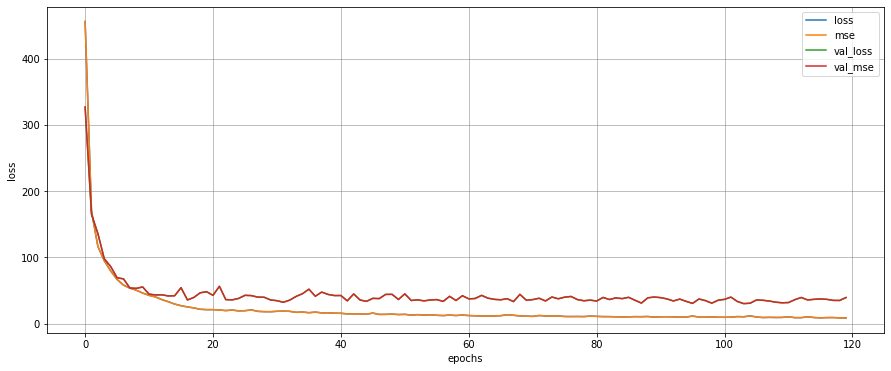

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(model.history.history).plot(figsize=(15,6))
plt.ylabel("loss")
plt.xlabel("epochs")
plt.grid(linewidth=0.5, color="gray")
plt.show()